In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [2]:
# Carga de datos, interpretando ? como nulo
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
    names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang",
           "oldpeak", "slope", "ca", "thal", "num"],
    na_values="?",
)

In [3]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)

In [4]:
# Convertir a problema de clasificacion binaria. Atributo target es num, y se distinguen dos casos:
# num=0 (negativo) y num=1 (positivo)
for ind, row in df.iterrows():
    if row["num"] > 0:
        df.at[ind, "num"] = 1

In [5]:
# x: eliminar target y atributos categoricos. Utilizar los dicotomicos sex, fbs y exang como atributos predictores.
x = df.drop(["num", "cp", "restecg", "slope", "thal"], axis=1)

In [6]:
# y: target
y = df['num']

In [7]:
# Normalización de atributos predictores (x)
x = (x-np.min(x))/(np.max(x)-np.min(x))
RANDOM_SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,
random_state=RANDOM_SEED)

In [8]:
# Entrenamiento de un clasificador k-NN
k = 11
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",11
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


Tasa de acierto en dataset de validacion:  0.7
Tasa de acierto en dataset de entrenamiento:  0.7088607594936709
precision:  0.625
sensibilidad (recall):  0.625
f1-score:  0.625
Metricas para dataset de validacion: 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        36
           1       0.62      0.62      0.62        24

    accuracy                           0.70        60
   macro avg       0.69      0.69      0.69        60
weighted avg       0.70      0.70      0.70        60



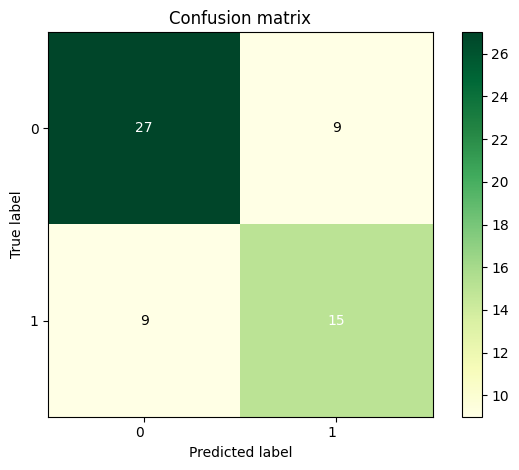

In [9]:
# Validacion
y_pred = clf.predict(x_test)
def plot_confusion_matrix(y_true, y_pred, normalize=None,
                         title=None, cmap=plt.cm.Blues, rotation=0):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
    labels = unique_labels(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation="nearest", cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(len(labels)),
        yticks=np.arange(len(labels)),
        xticklabels=labels,
        yticklabels=labels,
        ylabel="True label",
        xlabel="Predicted label",
        title=title or "Confusion matrix",
    )
    plt.setp(ax.get_xticklabels(), rotation=rotation, ha="right", rotation_mode="anchor")
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0 if cm.size else 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j,
                i,
                format(cm[i, j], fmt),
                ha="center",
                va="center",
                color="white" if cm[i, j] > thresh else "black",
            )
    fig.tight_layout()
    return ax

plot_confusion_matrix(y_test, y_pred, cmap="YlGn", rotation=0)
acc_rate = accuracy_score(y_test, y_pred)
print("Tasa de acierto en dataset de validacion: ", acc_rate)
y_pred = clf.predict(x_train)
acc_rate = accuracy_score(y_train, y_pred)
print("Tasa de acierto en dataset de entrenamiento: ", acc_rate)
y_pred = clf.predict(x_test)
print("precision: ", precision_score(y_test, y_pred))
print("sensibilidad (recall): ", recall_score(y_test, y_pred))
print("f1-score: ", f1_score(y_test, y_pred))
print("Metricas para dataset de validacion: \n" + classification_report(y_test, y_pred))